In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-minrescg-converge)

We will compare MINRES and CG on some quasi-random SPD problems.  The first matrix has a condition number of 100.

In [2]:
n = 5000
density = 0.001
A = FNC.sprandsym(n, density, 1 / 100)
x = (1:n) / n
b = A * x;

```{index} ! Julia; cg
```

Now we apply both methods and compare the convergence of the system residuals, using implementations imported from `IterativeSolvers`.

minres error: 1.182e-5


cg error: 5.052e-6


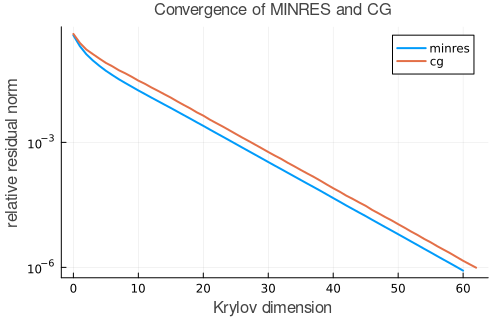

In [3]:
using IterativeSolvers
plt = plot(title="Convergence of MINRES and CG",
    xaxis=("Krylov dimension"),  yaxis=(:log10, "relative residual norm"))
for method in [minres, cg]
    x̃, history = method(A, b, reltol=1e-6, maxiter=1000, log=true)
    relres = history[:resnorm] / norm(b)
    plot!(0:length(relres)-1, relres, label="$method")
    err = round(norm(x̃ - x) / norm(x), sigdigits=4)
    println("$method error: $err")
end
plt

There is little difference between the two methods here. Next, we increase the condition number of the matrix by a factor of 25. The rule of thumb predicts that the number of iterations required should increase by a factor of about 5.

In [4]:
A = FNC.sprandsym(n, density, 1 / 2500)
b = A * x;

minres error: 0.0002404
cg error: 3.708e-5


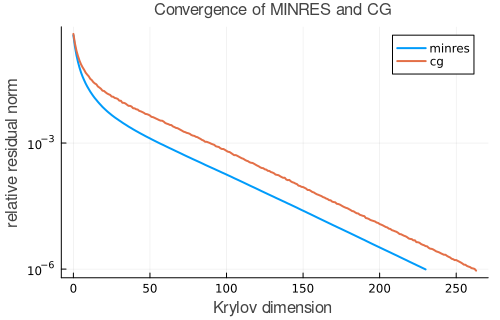

In [5]:
plt = plot(title="Convergence of MINRES and CG",
    xaxis=("Krylov dimension"), yaxis=(:log10, "relative residual norm"))
for method in [minres, cg]
    x̃, history = method(A, b, reltol=1e-6, maxiter=1000, log=true)
    relres = history[:resnorm] / norm(b)
    plot!(0:length(relres)-1, relres, label="$method")
    err = round(norm(x̃ - x) / norm(x), sigdigits=4)
    println("$method error: $err")
end
plt

Both methods have an early superlinear phase that allow them to finish slightly sooner than the factor of 5 predicted: {numref}`Theorem {number} <theorem-minrescg-converge>` is an upper bound, not necessarily an approximation. Both methods ultimately achieve the same reduction in the residual; MINRES stops earlier, but with a slightly larger error.